In [1]:
library(tidyverse)
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
data_2022_file <-"/kaggle/input/happiness/happiness_2022.csv"
data_2022 <- read.csv(data_2022_file,header = TRUE, sep = ',')
data_2022 <- data_2022[c(1,2,3,6,7,8,9,10,11,12)]
# head(data_2022)
names(data_2022)<-c('rank','country','score','dystopia','GDP','social_support','life','freedom','generosity','corruption')
# head(data_2022)

In [3]:
new_data_2022 <- data_2022 %>% pivot_longer(c('dystopia','GDP','social_support','life','freedom','generosity','corruption'),names_to  = "type",values_to = "points")

#new_data_2022 <- pivot_longer(data =data_2022 ,c(`Whisker.high`, `Whisker.low`), names_to = "year", values_to = "cases")
# head(new_data_2022)

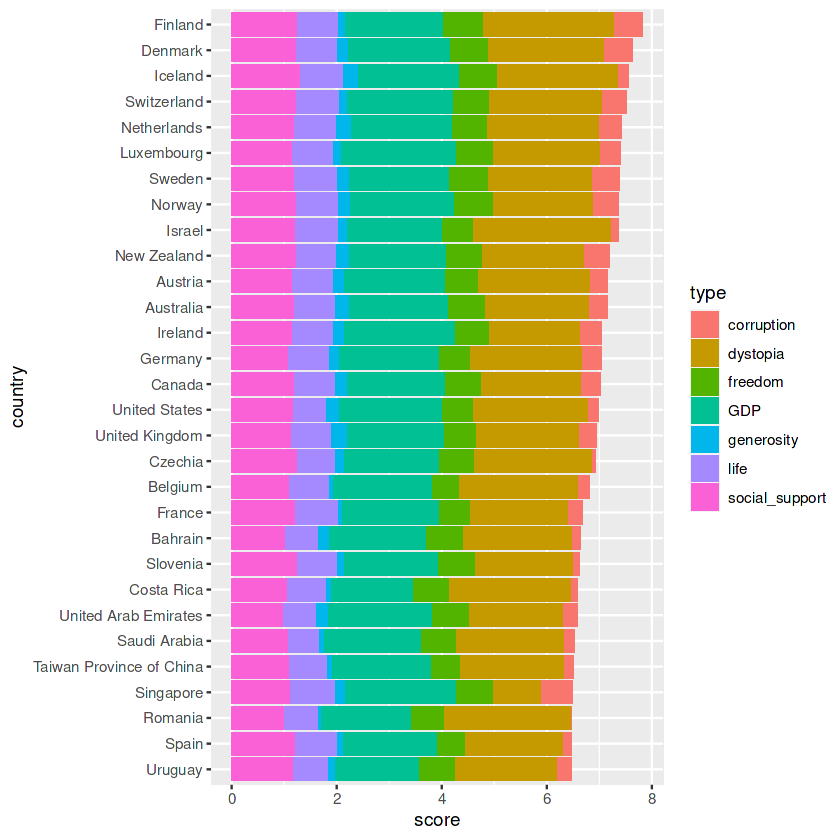

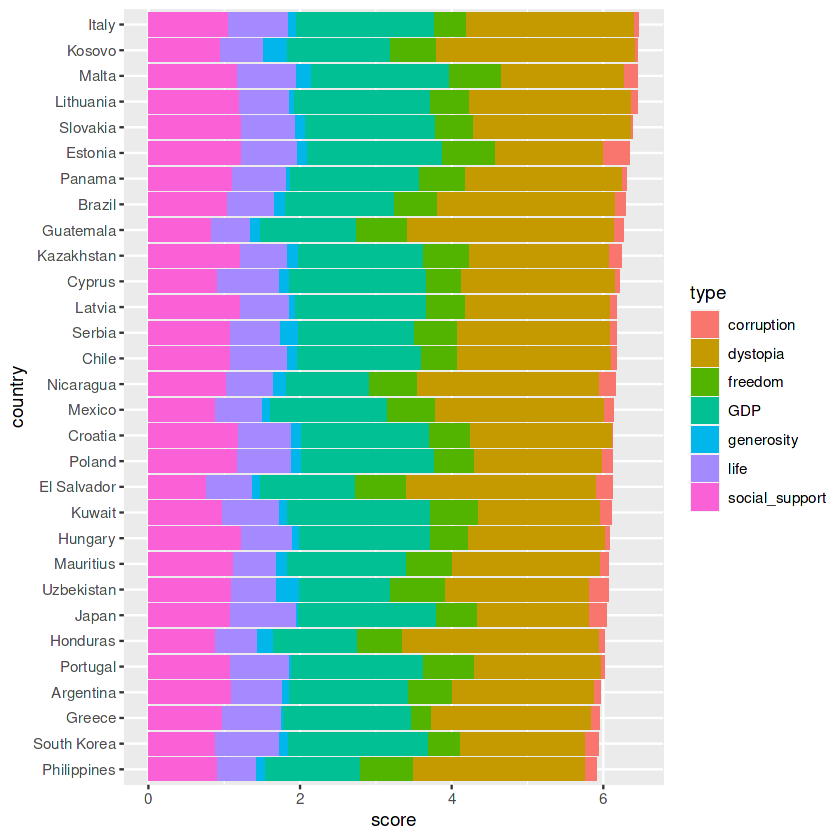

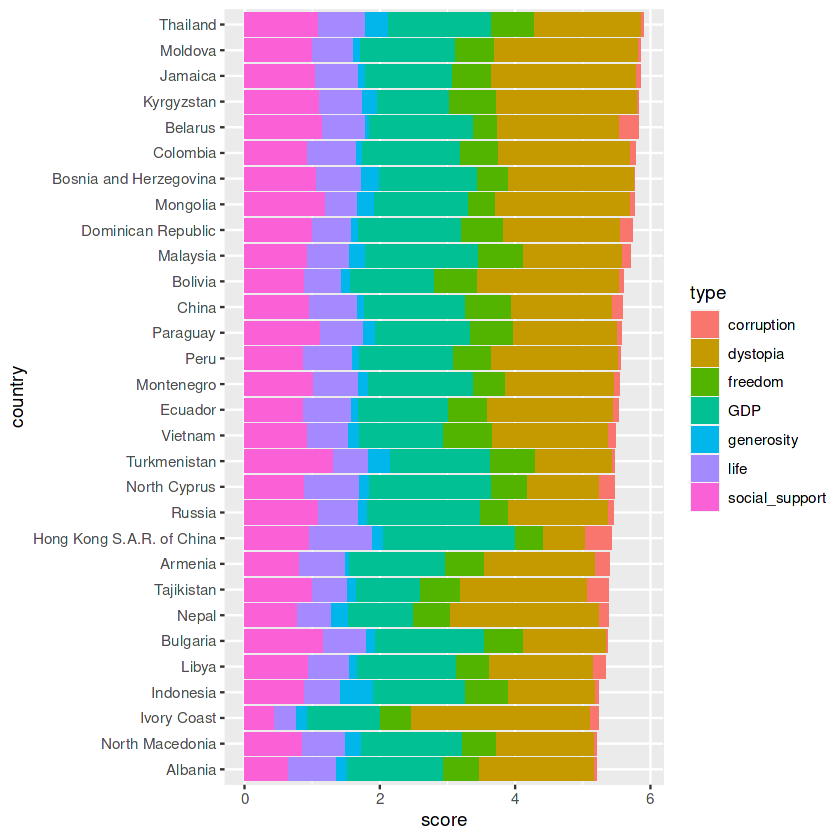

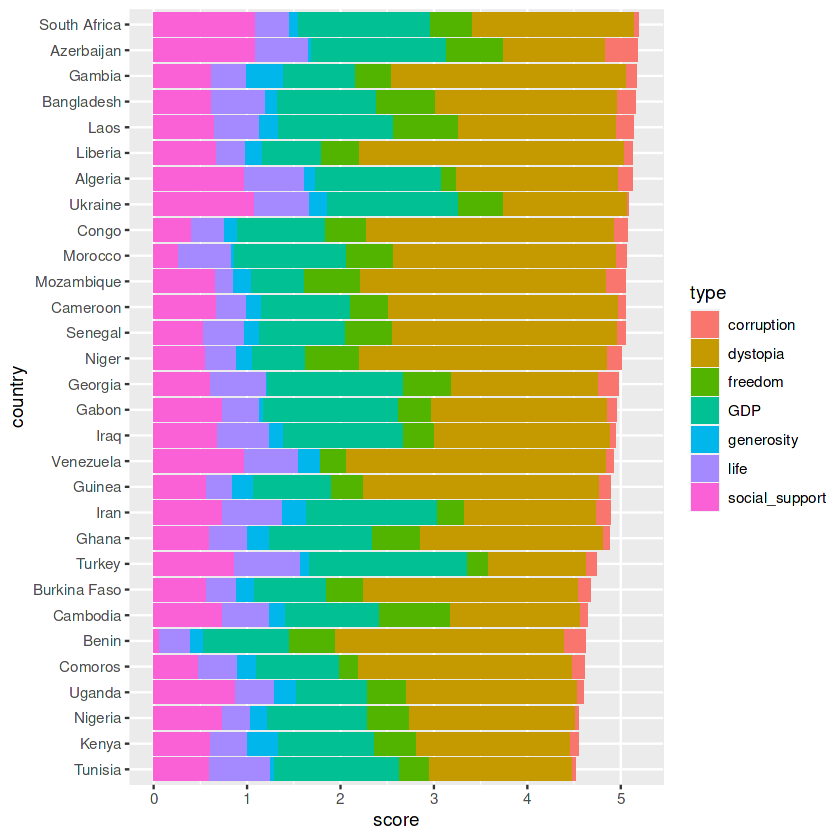

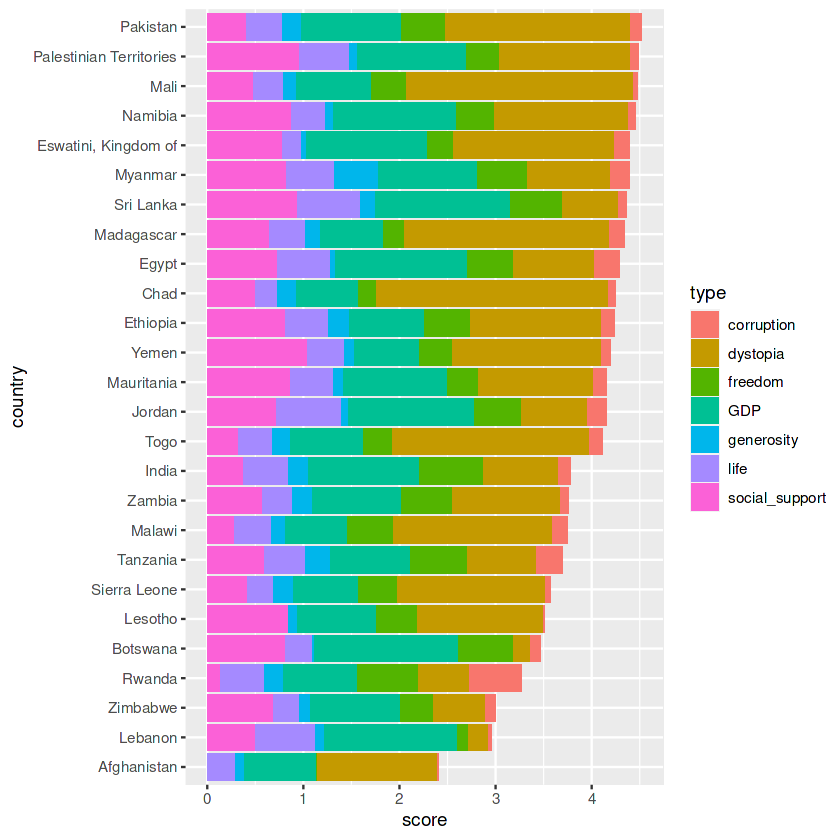

In [4]:
library(ggplot2)
library(dplyr)
library(forcats)

# 每30個國家一張圖(全部有146個)(這樣還會太密嗎)
for(i in 0:3) {
    new_data_2022_30 <- new_data_2022[(1+210*i):(210*(i+1)),]
    print(ggplot(new_data_2022_30,aes(x = reorder(country,score),y = points,fill = type)) + geom_bar(stat = "identity") + labs(x = "country",y = "score")+ coord_flip())
}
new_data_2022_30 <- new_data_2022[841:1022,]
print(ggplot(new_data_2022_30,aes(x = reorder(country,score),y = points,fill = type)) + geom_bar(stat = "identity") + labs(x = "country",y = "score")+ coord_flip())


Attaching package: ‘maps’


The following object is masked from ‘package:purrr’:

    map




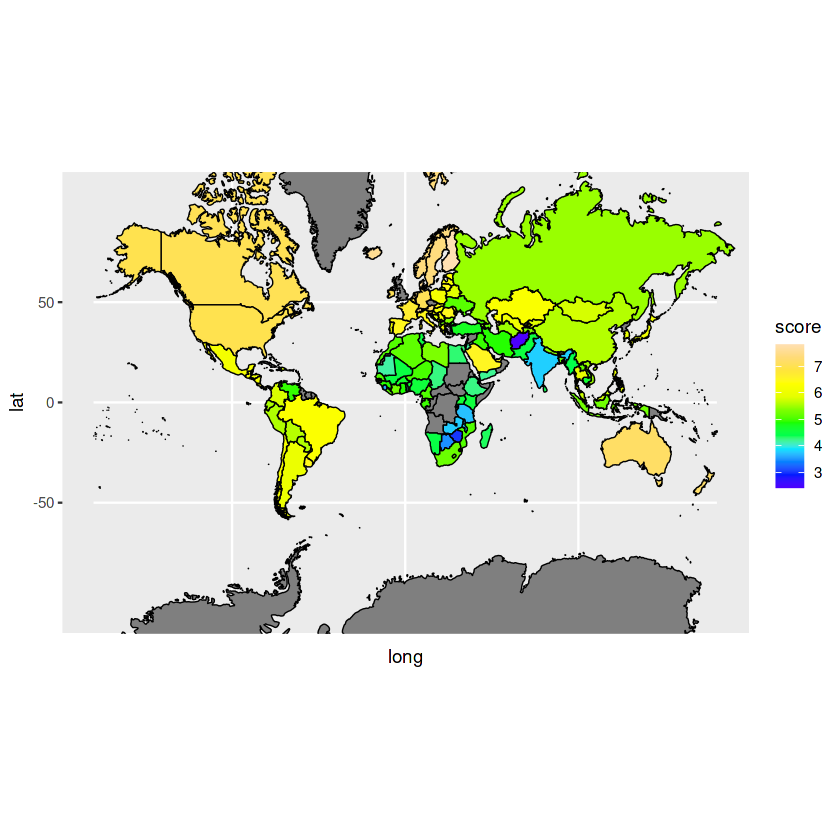

In [5]:
#地圖(2022)
# Load the libraries
library(ggplot2)
library(maps)

# Load the map data
map_data <- map_data("world")
for(i in 1:nrow(map_data)) {
    if(map_data[i,5] == 'USA')
        map_data[i,5] = 'United States'
}
#head(map_data)
data_temp <- data_2022[c(2,3)]
#data_temp
map_data_with <- merge(data_temp,map_data,by.x = "country",by.y = "region")
#head(map_data)
map_data_with <- map_data %>% left_join(data_temp, by = c("region"="country"))
# head(map_data_with)
ggplot() + geom_polygon(data = map_data_with, aes(x = long, y = lat, group = group, fill =score), size = 0.3, color = "black") + 
coord_map(xlim = c(-180, 180), ylim = c(-90, 90)) + scale_fill_gradientn(colours = topo.colors(12))

In [6]:
data_2015_file <-"/kaggle/input/world-happiness-report/2015.csv"
data_2016_file <-"/kaggle/input/world-happiness-report/2016.csv"
data_2017_file <-"/kaggle/input/world-happiness-report/2017.csv"
data_2018_file <-"/kaggle/input/world-happiness-report/2018.csv"
data_2019_file <-"/kaggle/input/world-happiness-report/2019.csv"
data_2020_file <-"/kaggle/input/world-happiness-report/2020.csv"
data_2021_file <-"/kaggle/input/world-happiness-report/2021.csv"
data_2015 <- read.csv(data_2015_file,header = TRUE, sep = ',')
data_2016 <- read.csv(data_2016_file,header = TRUE, sep = ',')
data_2017 <- read.csv(data_2017_file,header = TRUE, sep = ',')
data_2018 <- read.csv(data_2018_file,header = TRUE, sep = ',')
data_2019 <- read.csv(data_2019_file,header = TRUE, sep = ',')
data_2020 <- read.csv(data_2020_file,header = TRUE, sep = ',')
data_2021 <- read.csv(data_2021_file,header = TRUE, sep = ',')
#head(data_2015)
#head(data_2016)
#head(data_2017)
#head(data_2018)
#head(data_2019)
#head(data_2020)
#head(data_2021)

In [7]:
#data_2022 <- data_2022[c(1,2,3,6,7,8,9,10,11,12)]
#names(data_2022)<-c('rank','country','score','dystopia','GDP','social_support','life','freedom','generosity','corruption')
# head(data_2022)
#在這格先取我們要的column 排序後 重新命名

data_2015 <- data_2015[c(3,1,4,12,6,7,8,9,11,10)]
names(data_2015)<-c('rank','country','score','dystopia','GDP','social_support','life','freedom','generosity','corruption')
head(data_2015)

data_2016 <- data_2016[c(3,1,4,13,7,8,9,10,12,11)]
names(data_2016)<-c('rank','country','score','dystopia','GDP','social_support','life','freedom','generosity','corruption')
head(data_2016)

data_2017 <- data_2017[c(2,1,3,12,6,7,8,9,10,11)]
names(data_2017)<-c('rank','country','score','dystopia','GDP','social_support','life','freedom','generosity','corruption')
head(data_2017)

data_2018 <- transform(data_2018, Perceptions.of.corruption = as.numeric(Perceptions.of.corruption))
data_2018[is.na(data_2018)] <- 0
data_2018 <- cbind(data_2018, dys = data_2018[,3] - rowSums(data_2018[,c(4,5,6,7,8,9)]))
data_2018 <- data_2018[c(1,2,3,10,4,5,6,7,8,9)]
names(data_2018)<-c('rank','country','score','dystopia','GDP','social_support','life','freedom','generosity','corruption')
head(data_2018)

data_2019 <- cbind(data_2019, dys = data_2019[,3] - rowSums(data_2019[,c(4,5,6,7,8,9)]))
data_2019 <- data_2019[c(1,2,3,10,4,5,6,7,8,9)]
names(data_2019)<-c('rank','country','score','dystopia','GDP','social_support','life','freedom','generosity','corruption')
head(data_2019)

data_2020 <- cbind(data_2020, rank = 1:nrow(data_2020))
data_2020 <- data_2020[c(21,1,3,20,14,15,16,17,18,19)]
names(data_2020)<-c('rank','country','score','dystopia','GDP','social_support','life','freedom','generosity','corruption')
head(data_2020)

data_2021 <- cbind(data_2021, rank = 1:nrow(data_2021))
data_2021 <- data_2021[c(21,1,3,20,14,15,16,17,18,19)]
names(data_2021)<-c('rank','country','score','dystopia','GDP','social_support','life','freedom','generosity','corruption')
head(data_2021)

,rank,country,score,dystopia,GDP,social_support,life,freedom,generosity,corruption
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Switzerland,7.587,2.51738,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
2,2,Iceland,7.561,2.70201,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
3,3,Denmark,7.527,2.49204,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
4,4,Norway,7.522,2.46531,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
5,5,Canada,7.427,2.45176,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957
6,6,Finland,7.406,2.61955,1.29025,1.31826,0.88911,0.64169,0.23351,0.41372


,rank,country,score,dystopia,GDP,social_support,life,freedom,generosity,corruption
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Denmark,7.526,2.73939,1.44178,1.16374,0.79504,0.57941,0.36171,0.44453
2,2,Switzerland,7.509,2.69463,1.52733,1.14524,0.86303,0.58557,0.28083,0.41203
3,3,Iceland,7.501,2.83137,1.42666,1.18326,0.86733,0.56624,0.47678,0.14975
4,4,Norway,7.498,2.66465,1.57744,1.12690,0.79579,0.59609,0.37895,0.35776
5,5,Finland,7.413,2.82596,1.40598,1.13464,0.81091,0.57104,0.25492,0.41004
6,6,Canada,7.404,2.70485,1.44015,1.09610,0.82760,0.57370,0.44834,0.31329


,rank,country,score,dystopia,GDP,social_support,life,freedom,generosity,corruption
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Norway,7.537,2.277027,1.616463,1.533524,0.7966665,0.6354226,0.3620122,0.3159638
2,2,Denmark,7.522,2.313707,1.482383,1.551122,0.7925655,0.6260067,0.3552805,0.4007701
3,3,Iceland,7.504,2.322715,1.480633,1.610574,0.8335521,0.6271626,0.4755402,0.1535266
4,4,Switzerland,7.494,2.276716,1.564980,1.516912,0.8581313,0.6200706,0.2905493,0.3670073
5,5,Finland,7.469,2.430182,1.443572,1.540247,0.8091577,0.6179509,0.2454828,0.3826115
6,6,Netherlands,7.377,2.294804,1.503945,1.428939,0.8106961,0.5853845,0.4704898,0.2826618


Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
“NAs introduced by coercion”


,rank,country,score,dystopia,GDP,social_support,life,freedom,generosity,corruption
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Finland,7.632,2.585,1.305,1.592,0.874,0.681,0.202,0.393
2,2,Norway,7.594,2.383,1.456,1.582,0.861,0.686,0.286,0.340
3,3,Denmark,7.555,2.371,1.351,1.590,0.868,0.683,0.284,0.408
4,4,Iceland,7.495,2.426,1.343,1.644,0.914,0.677,0.353,0.138
5,5,Switzerland,7.487,2.318,1.420,1.549,0.927,0.660,0.256,0.357
6,6,Netherlands,7.441,2.448,1.361,1.488,0.878,0.638,0.333,0.295


,rank,country,score,dystopia,GDP,social_support,life,freedom,generosity,corruption
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Finland,7.769,2.714,1.340,1.587,0.986,0.596,0.153,0.393
2,2,Denmark,7.600,2.394,1.383,1.573,0.996,0.592,0.252,0.410
3,3,Norway,7.554,2.241,1.488,1.582,1.028,0.603,0.271,0.341
4,4,Iceland,7.494,2.401,1.380,1.624,1.026,0.591,0.354,0.118
5,5,Netherlands,7.488,2.394,1.396,1.522,0.999,0.557,0.322,0.298
6,6,Switzerland,7.480,2.272,1.452,1.526,1.052,0.572,0.263,0.343


,rank,country,score,dystopia,GDP,social_support,life,freedom,generosity,corruption
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Finland,7.8087,2.762835,1.285190,1.499526,0.9612714,0.6623167,0.1596704,0.4778573
2,2,Denmark,7.6456,2.432741,1.326949,1.503449,0.9793326,0.6650399,0.2427934,0.4952603
3,3,Switzerland,7.5599,2.350267,1.390774,1.472403,1.0405332,0.6289545,0.2690558,0.4079459
4,4,Iceland,7.5045,2.460688,1.326502,1.547567,1.0008434,0.6619807,0.3623302,0.1445408
5,5,Norway,7.4880,2.168266,1.424207,1.495173,1.0080719,0.6702009,0.2879851,0.4341006
6,6,Netherlands,7.4489,2.352117,1.338946,1.463646,0.9756753,0.6136265,0.3363176,0.3685698


,rank,country,score,dystopia,GDP,social_support,life,freedom,generosity,corruption
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Finland,7.842,3.253,1.446,1.106,0.741,0.691,0.124,0.481
2,2,Denmark,7.620,2.868,1.502,1.108,0.763,0.686,0.208,0.485
3,3,Switzerland,7.571,2.839,1.566,1.079,0.816,0.653,0.204,0.413
4,4,Iceland,7.554,2.967,1.482,1.172,0.772,0.698,0.293,0.170
5,5,Netherlands,7.464,2.798,1.501,1.079,0.753,0.647,0.302,0.384
6,6,Norway,7.392,2.580,1.543,1.108,0.782,0.703,0.249,0.427


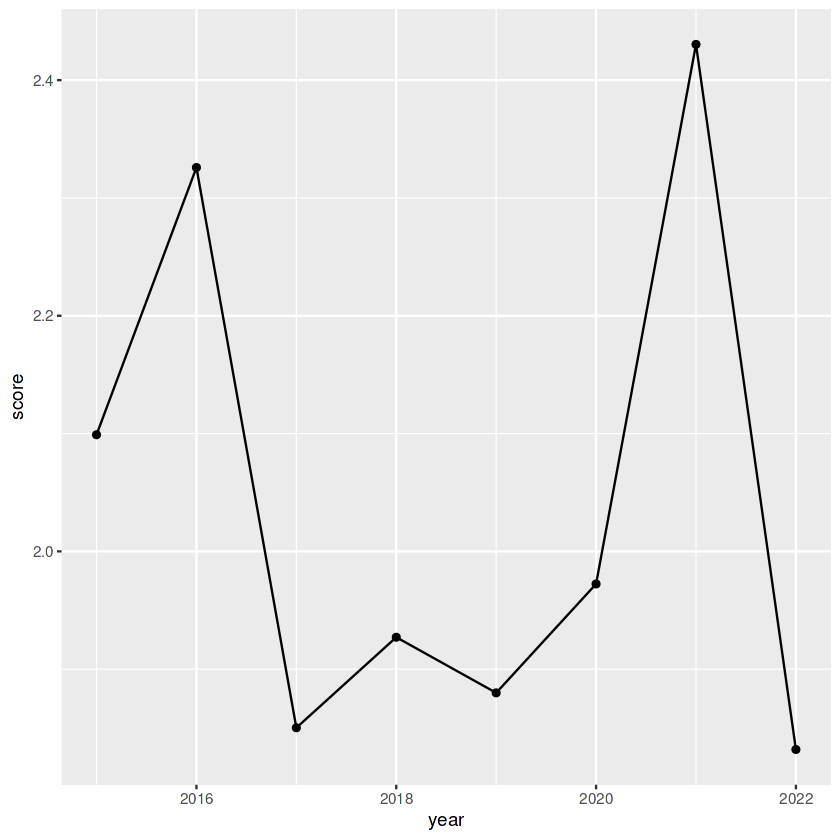

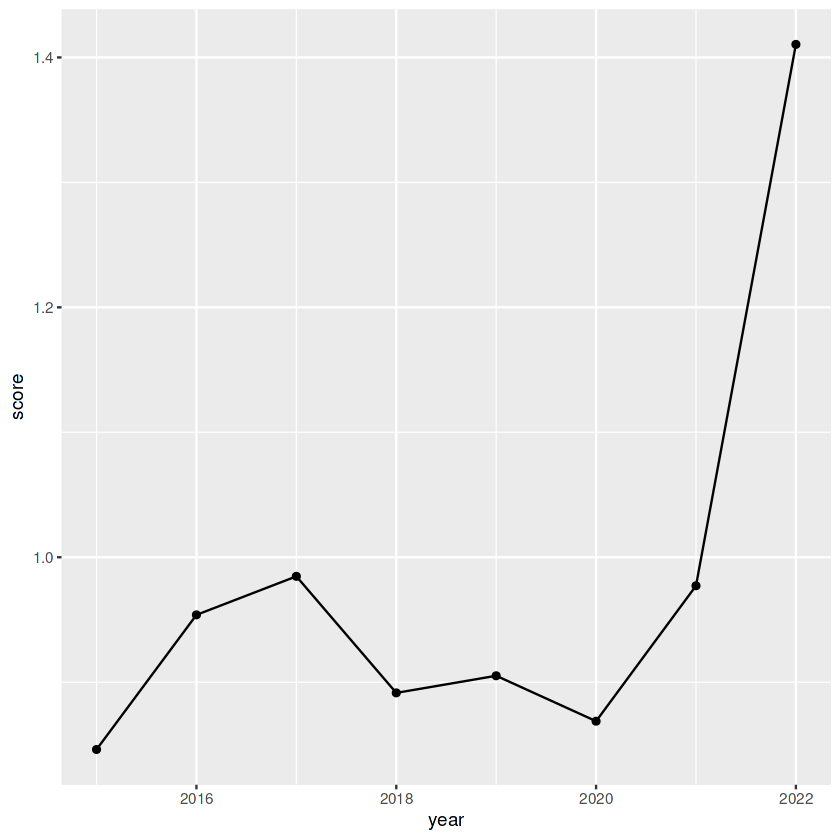

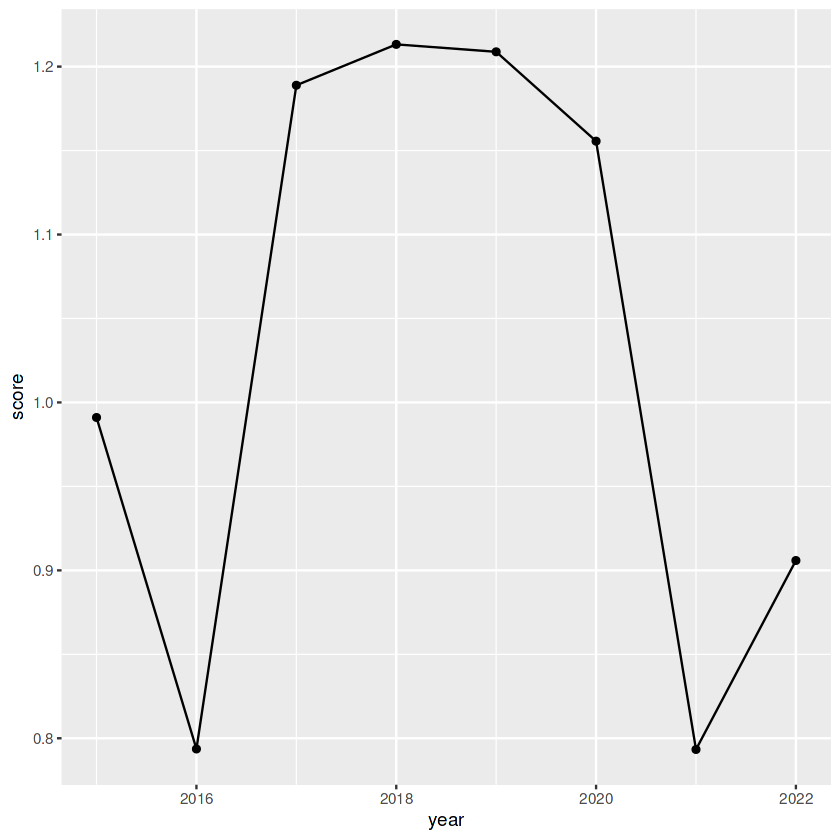

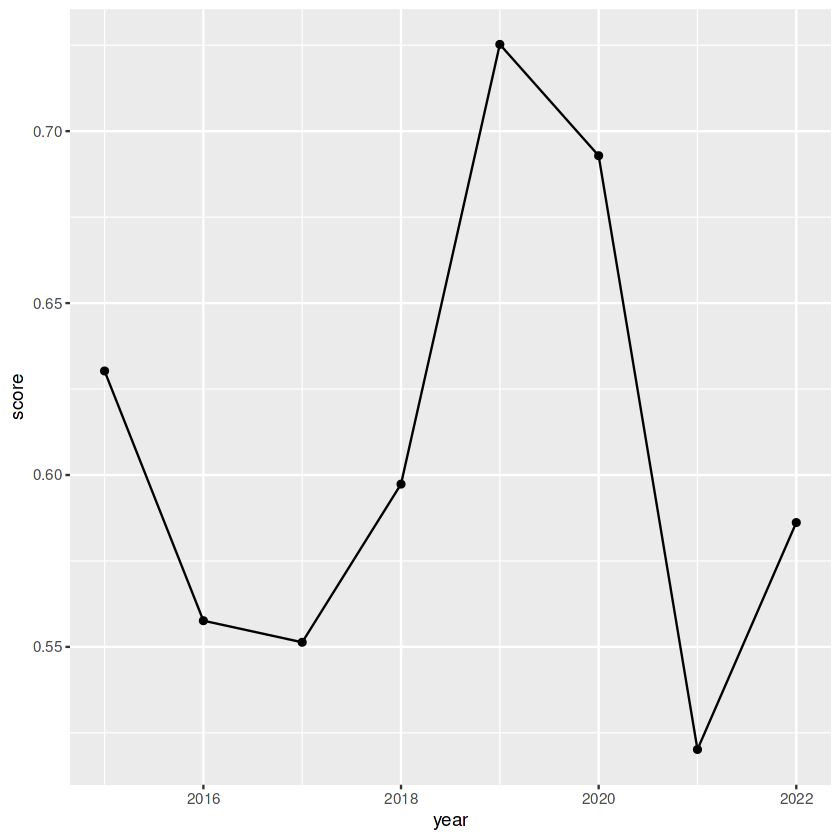

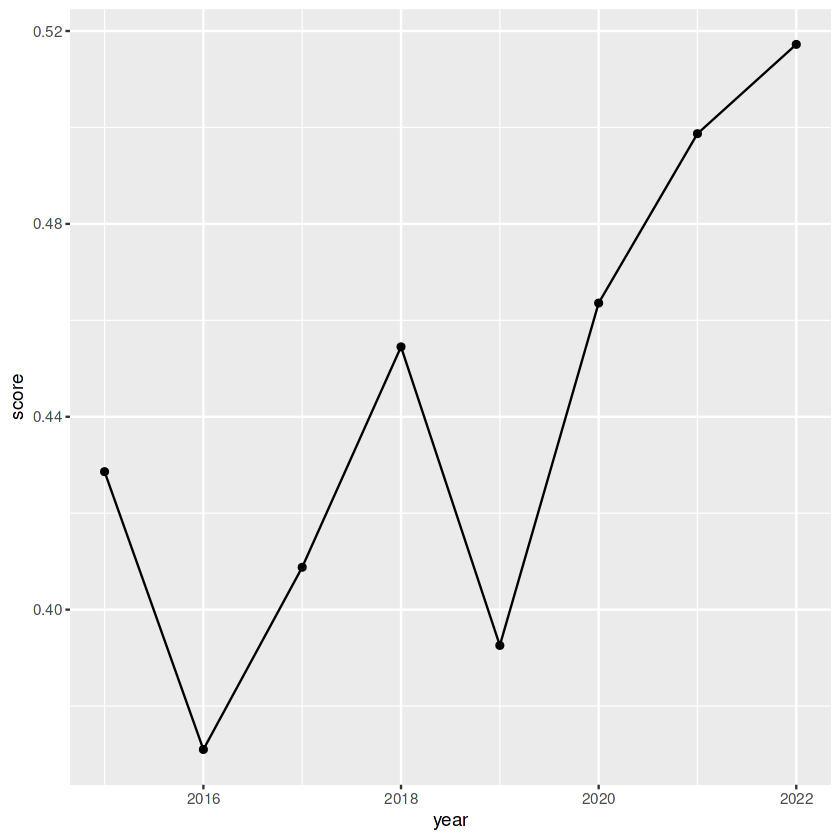

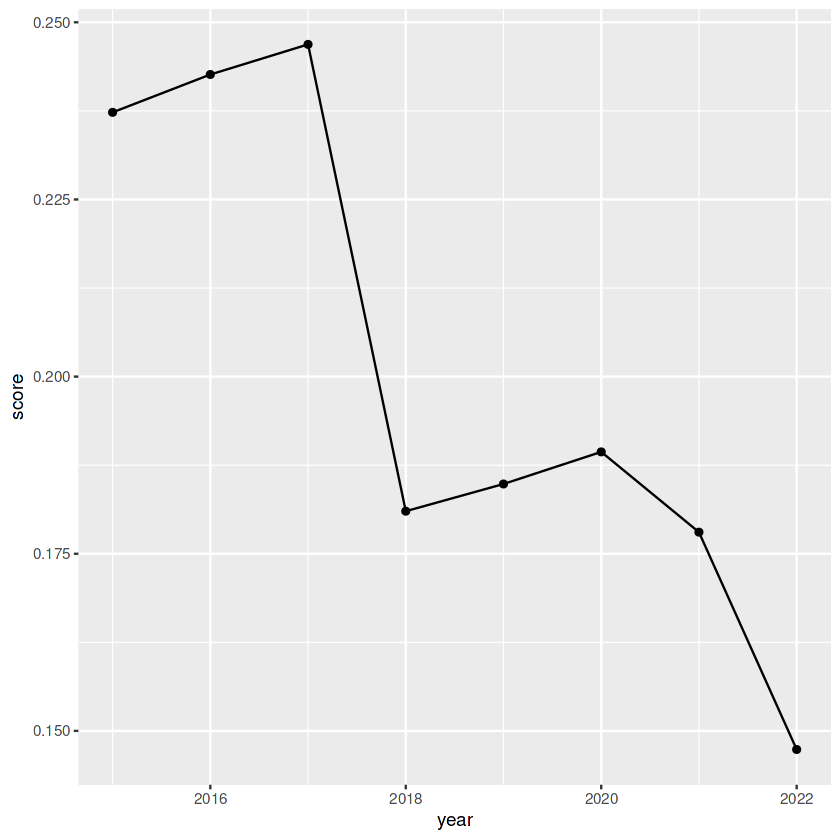

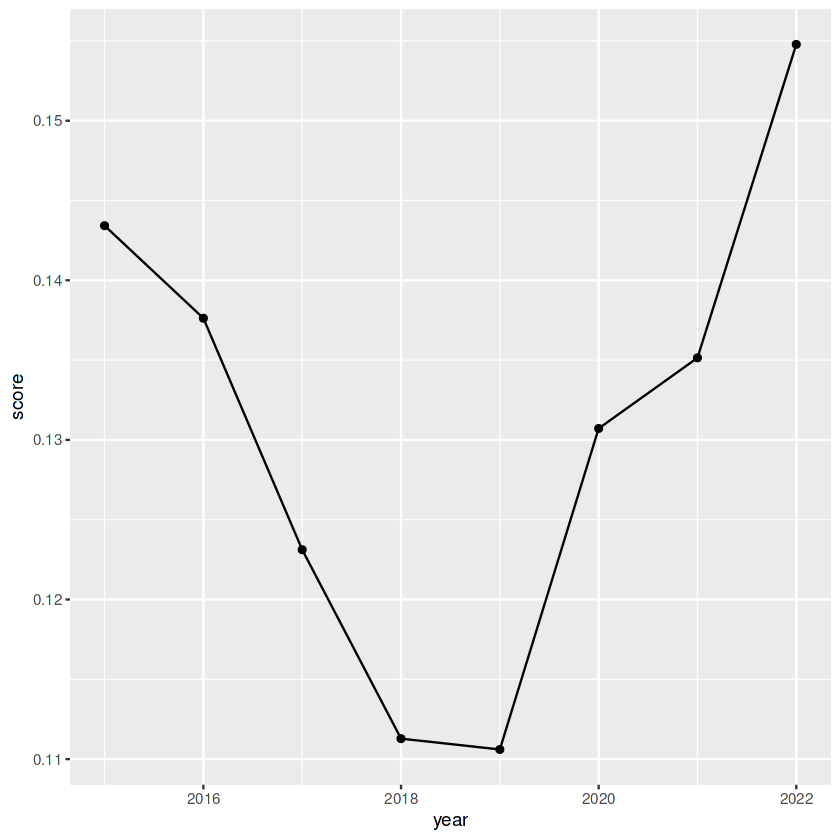

In [8]:
for(i in 4:10) {
    mean_2015 <- mean(data_2015[,i])
    mean_2016 <- mean(data_2016[,i])
    mean_2017 <- mean(data_2017[,i])
    mean_2018 <- mean(data_2018[,i])
    mean_2019 <- mean(data_2019[,i])
    mean_2020 <- mean(data_2020[,i])
    mean_2021 <- mean(data_2021[,i])
    mean_2022 <- mean(data_2022[,i])
    data <- data.frame(year = c(2015:2022), score = c(mean_2015, mean_2016, mean_2017, mean_2018, mean_2019, mean_2020, mean_2021, mean_2022))
    print(ggplot(data = data) + geom_point(mapping = aes(x = year, y = score)) + geom_line(mapping = aes(x = year,y = score)))
}

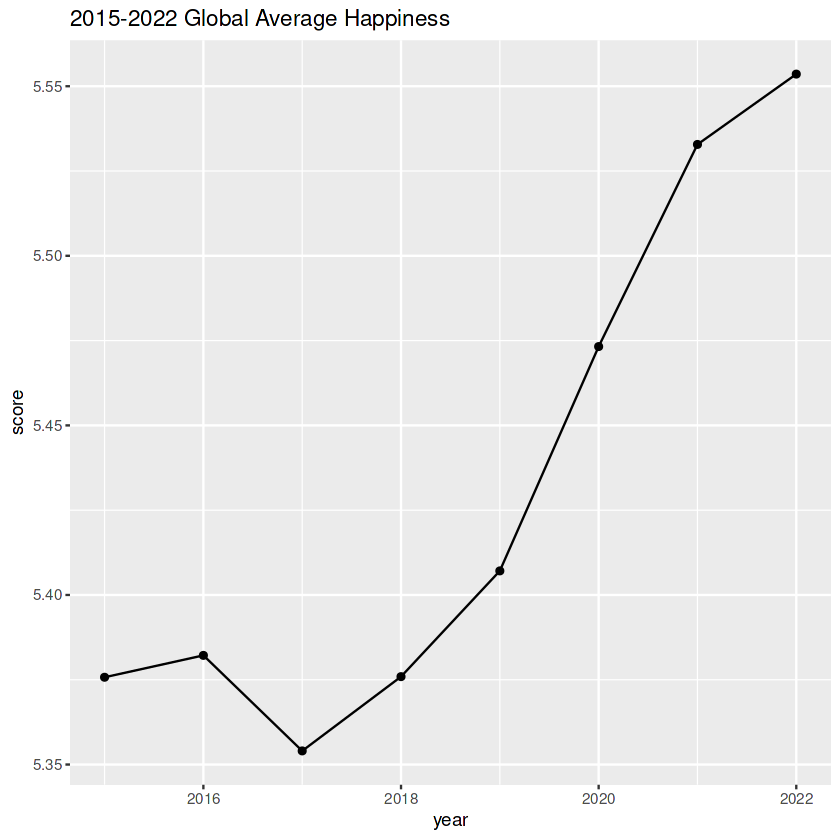

In [9]:
mean_2015 <- mean(data_2015$score)
mean_2016 <- mean(data_2016$score)
mean_2017 <- mean(data_2017$score)
mean_2018 <- mean(data_2018$score)
mean_2019 <- mean(data_2019$score)
mean_2020 <- mean(data_2020$score)
mean_2021 <- mean(data_2021$score)
mean_2022 <- mean(data_2022$score)
data <- data.frame(year = c(2015:2022), score = c(mean_2015, mean_2016, mean_2017, mean_2018, mean_2019, mean_2020, mean_2021, mean_2022))
ggplot(data = data) + geom_point(mapping = aes(x = year, y = score)) + geom_line(mapping = aes(x = year,y = score)) +
labs(title = "2015-2022 Global Average Happiness")

Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


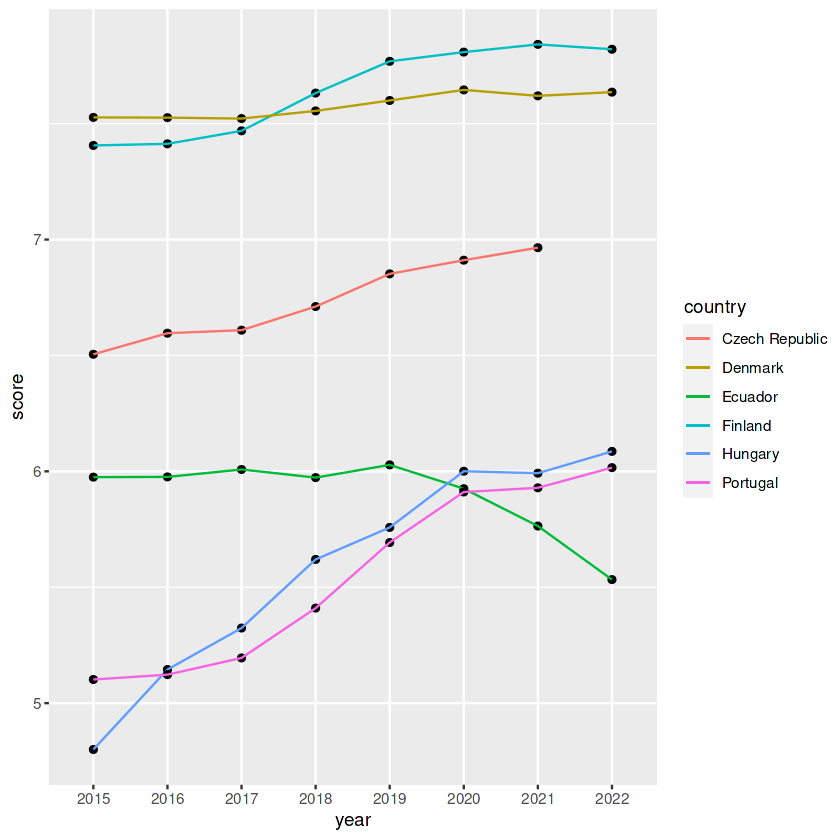

In [10]:
#各國折線圖
#先把全部data接起來
#只留國家 分數
#用for 迴圈畫圖
listdata<-list(data_2016,data_2017,data_2018,data_2019,data_2020,data_2021,data_2022)
combined <- rbind(data_2015,data_2016,data_2017,data_2018,data_2019,data_2020,data_2021,data_2022)
#combined <- cbind(data_2015[, c("country","score")], data_2016[, c("country","score")],data_2017[, c("country","score")],data_2018[, c("country","score")],data_2019[, c("country","score")],data_2020[, c("country","score")]，data_2021[, c("country","score")],data_2022[, c("country","score")])

mergedata<-data_2015[c(2,3)]
name<-c("country","2015")
year<-2015

for(i in listdata){
    year<-year+1
    mergedata<-merge(mergedata,i[c(2,3)],by="country",all=T)
    name<-c(name,as.character(year))
    names(mergedata)<-name
}
# mergedata
mergedata<-cbind(mergedata,sum=rowSums(mergedata[2:9],na.rm=TRUE))
mergedata<-mergedata[order(mergedata$sum,decreasing=TRUE),]

plot<-ggplot()
for(i in 1:2){
    # mergedata[i,][10]<-sum(mergedata[i,][c(2,3,4,5,6,7,8,9)])
    country_name<-mergedata[i,][1]
    country_data<-mergedata[i,] %>% pivot_longer(c('2015','2016','2017','2018','2019','2020','2021','2022'),names_to="year",values_to="score")
    #mergedata[i,][10]<-sum(country_data$score)
    
    plot<-plot+ geom_point(data = country_data,mapping = aes(x = year, y = score)) + geom_line(data = country_data,mapping = aes(x = year, y = score,group=1,color=country))
}
for(i in 50:51){
    country_name<-mergedata[i,][1]
    country_data<-mergedata[i,] %>% pivot_longer(c('2015','2016','2017','2018','2019','2020','2021','2022'),names_to="year",values_to="score")
    plot<-plot+ geom_point(data = country_data,mapping = aes(x = year, y = score)) + geom_line(data = country_data,mapping = aes(x = year, y = score,group=1,color=country))    
}
for(i in (nrow(mergedata)/2-20):((nrow(mergedata)/2)-19)){
    country_name<-mergedata[i,][1]
    country_data<-mergedata[i,] %>% pivot_longer(c('2015','2016','2017','2018','2019','2020','2021','2022'),names_to="year",values_to="score")
    plot<-plot+ geom_point(data = country_data,mapping = aes(x = year, y = score)) + geom_line(data = country_data,mapping = aes(x = year, y = score,group=1,color=country))    
}
plot
# new_data_2022 <- data_2022 %>% pivot_longer(c('dystopia','GDP','social_support',
# 'life','freedom','generosity','corruption'),names_to  = "type",values_to = "points")

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



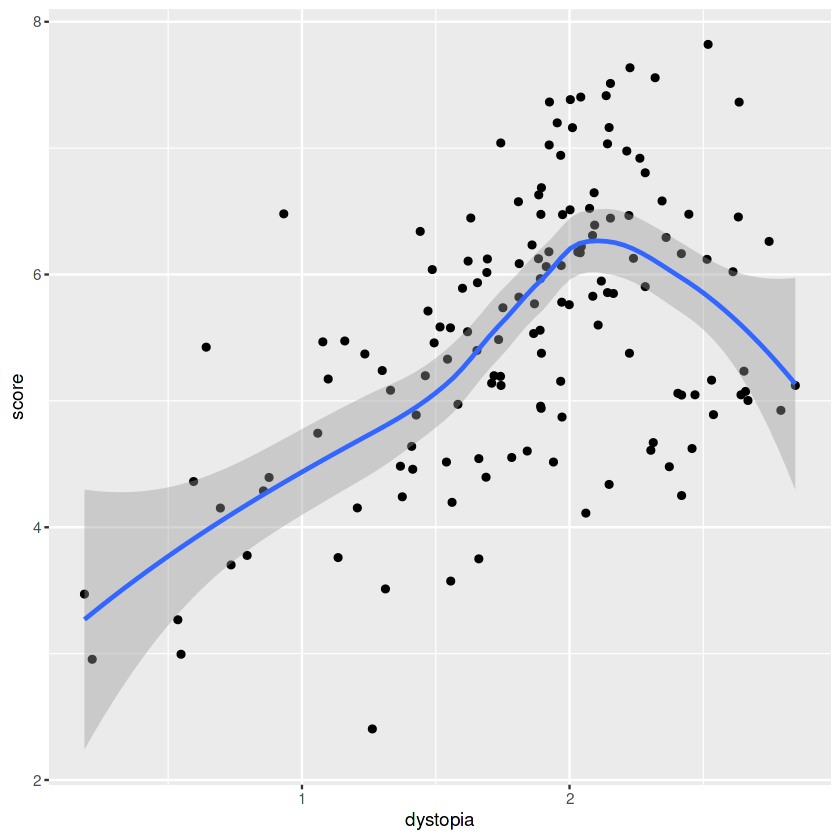

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



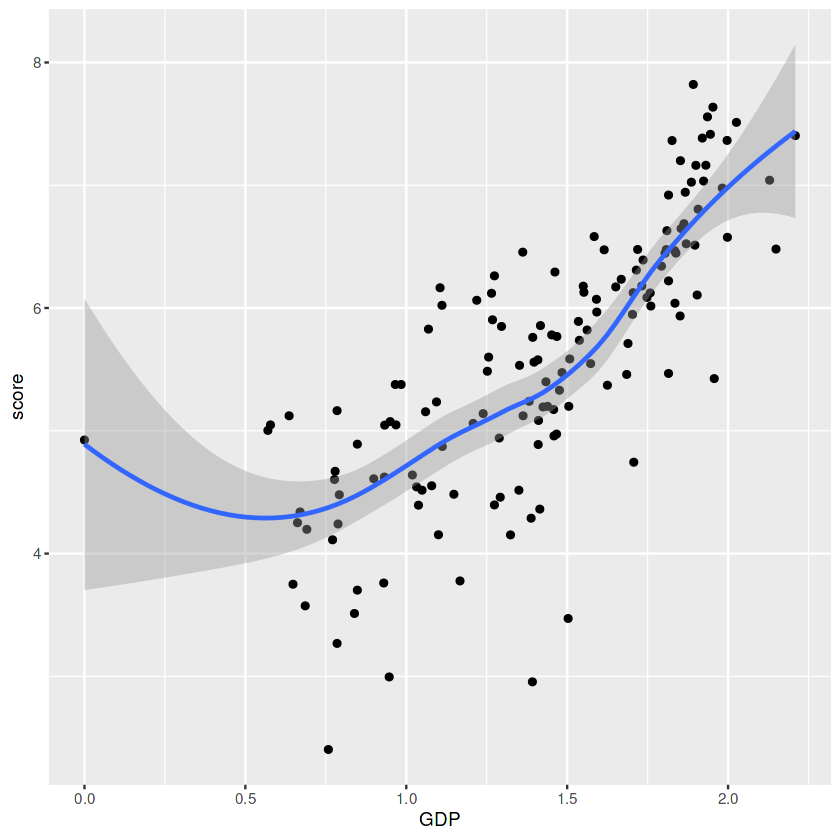

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



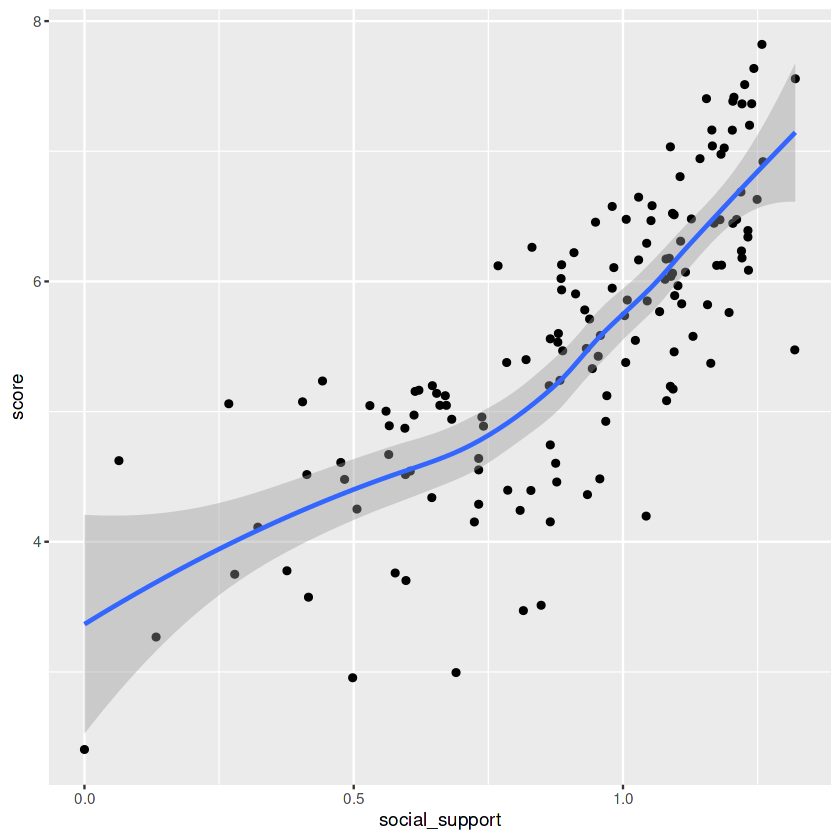

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



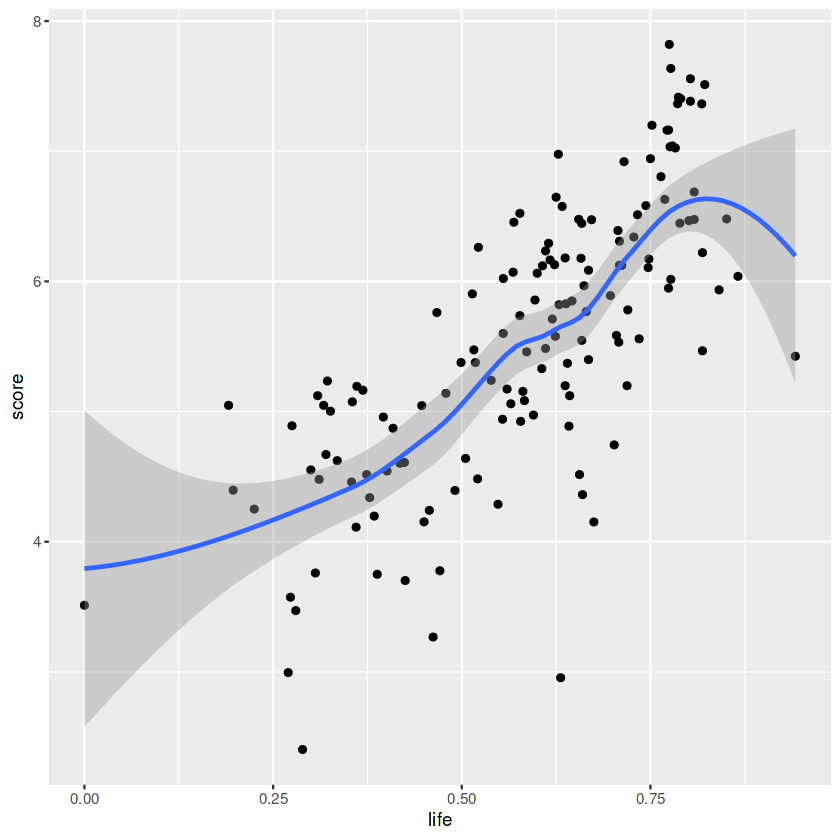

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



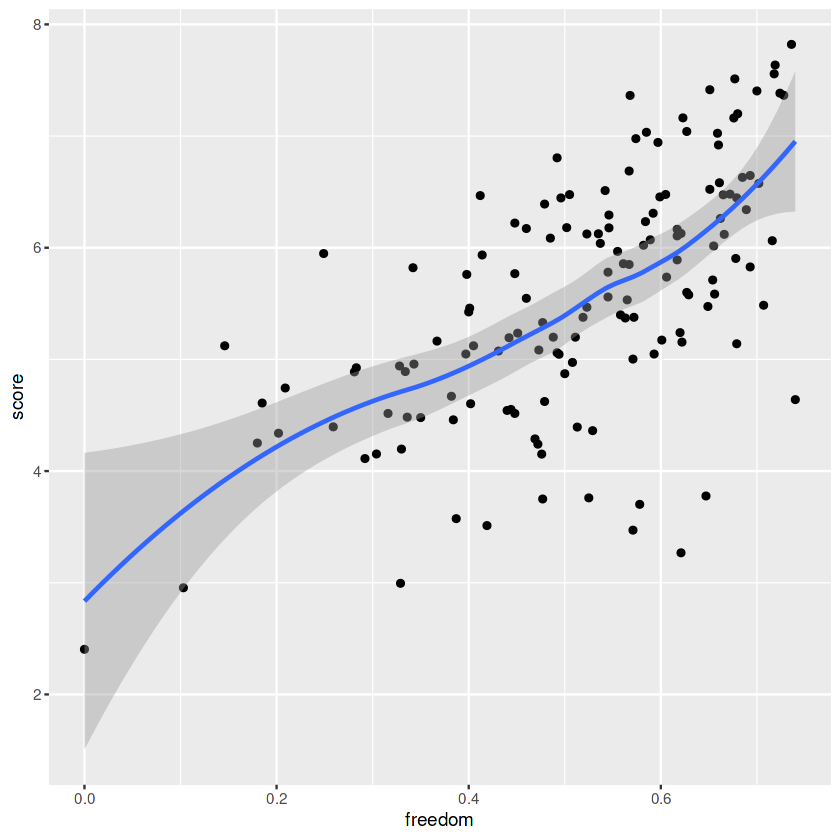

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



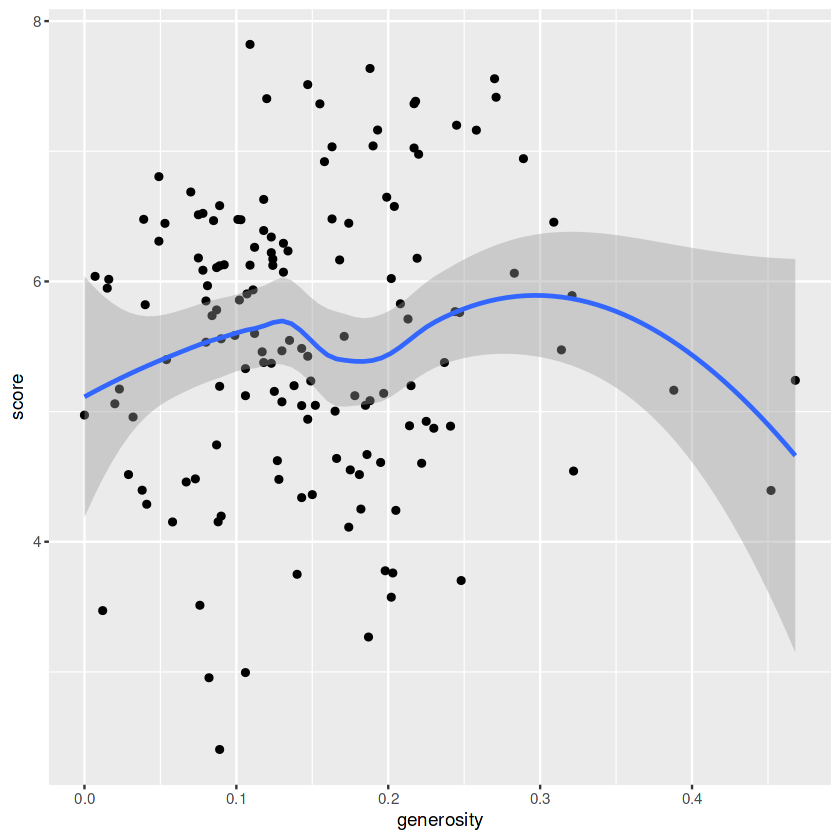

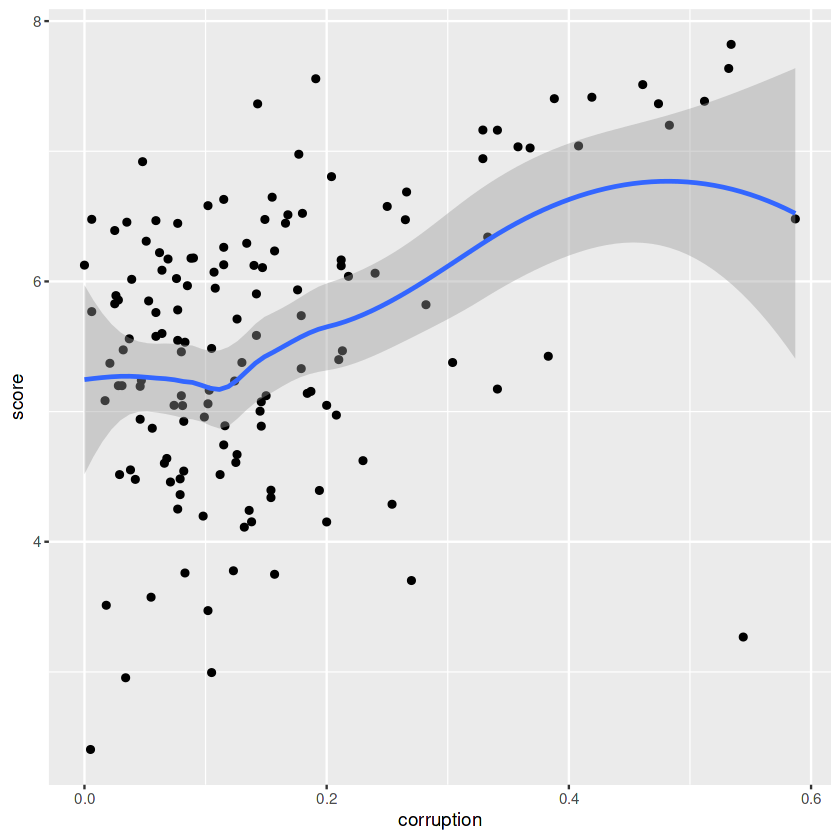

In [11]:
#這裡改成前面全部年份的
library(ggplot2)
ggplot(data = data_2022) +geom_point(mapping = aes(x= dystopia,y = score))+geom_smooth(mapping = aes(x= dystopia,y = score))
ggplot(data = data_2022) +geom_point(mapping = aes(x= GDP,y = score))+geom_smooth(mapping = aes(x= GDP,y = score))
ggplot(data = data_2022) +geom_point(mapping = aes(x= social_support,y = score))+geom_smooth(mapping = aes(x= social_support,y = score))
ggplot(data = data_2022) +geom_point(mapping = aes(x= life,y = score))+geom_smooth(mapping = aes(x= life,y = score))
ggplot(data = data_2022) +geom_point(mapping = aes(x= freedom,y = score))+geom_smooth(mapping = aes(x= freedom,y =  score))
ggplot(data = data_2022) +geom_point(mapping = aes(x= generosity,y =score))+geom_smooth(mapping = aes(x= generosity,y =  score))
ggplot(data = data_2022) +geom_point(mapping = aes(x= corruption,y = score))+geom_smooth(mapping = aes(x= corruption,y =  score))

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



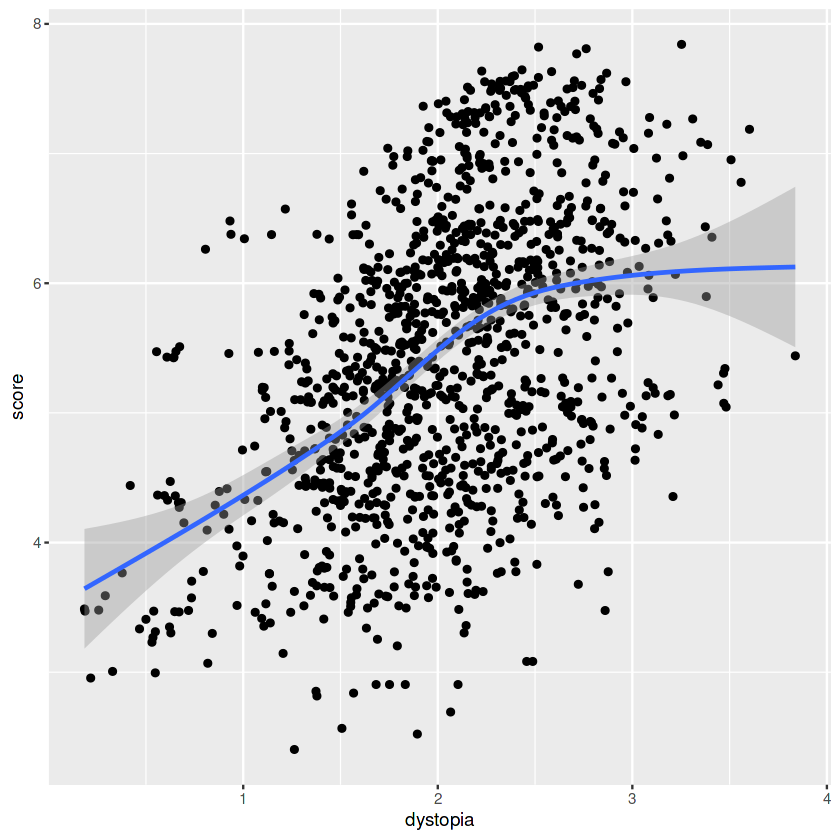

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



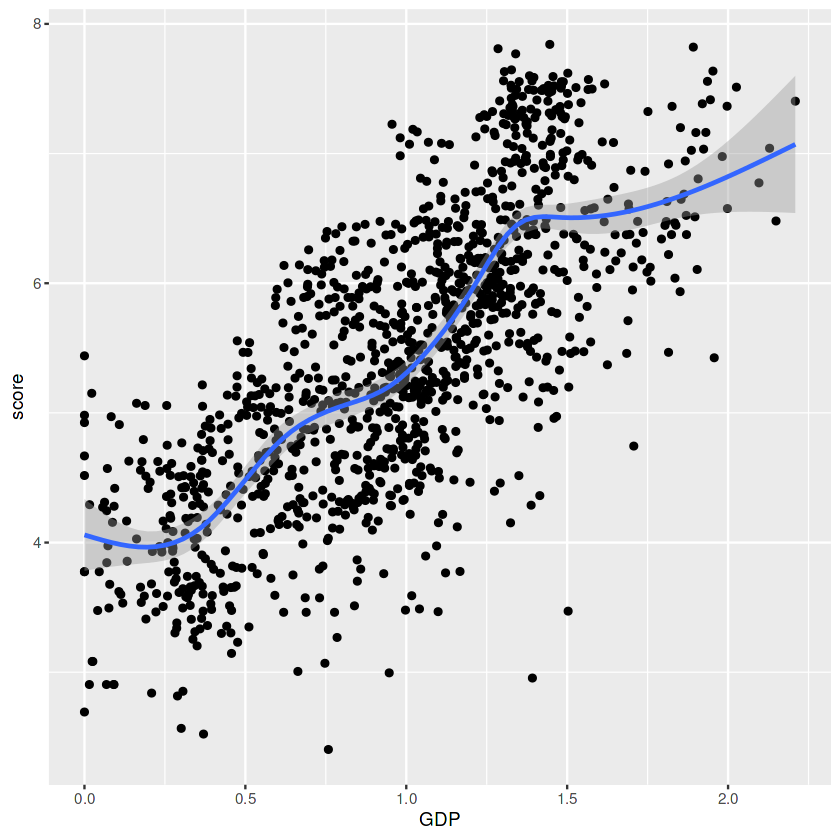

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



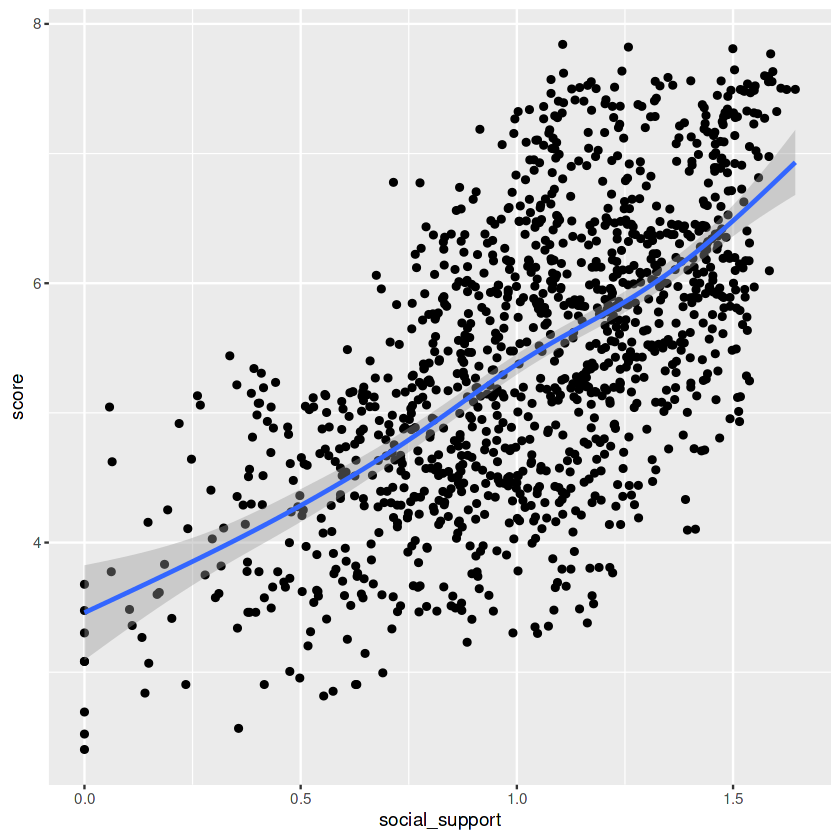

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



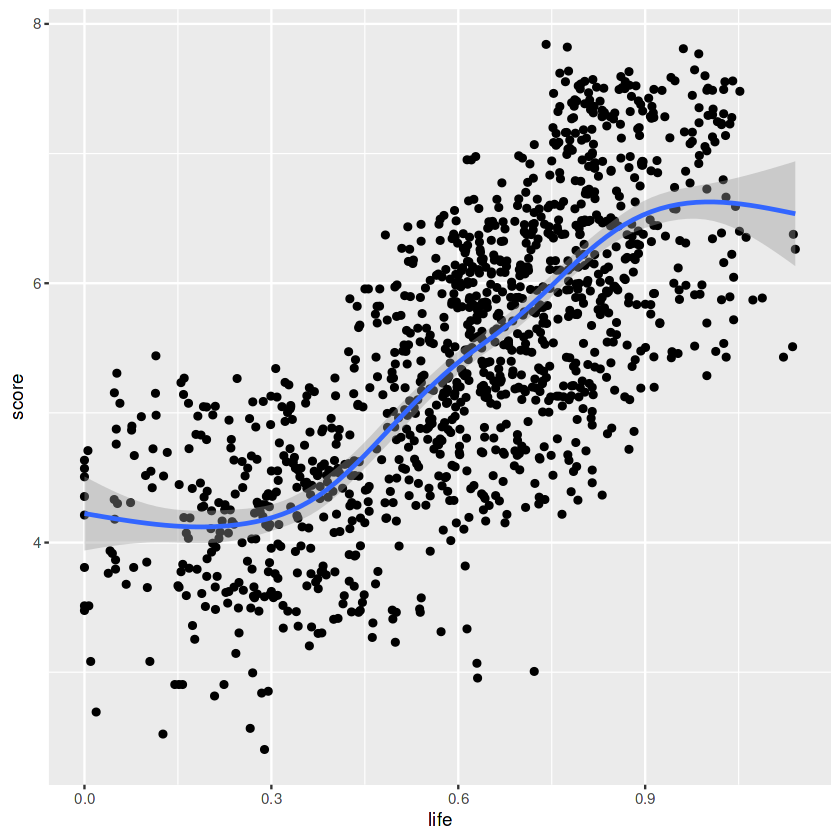

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



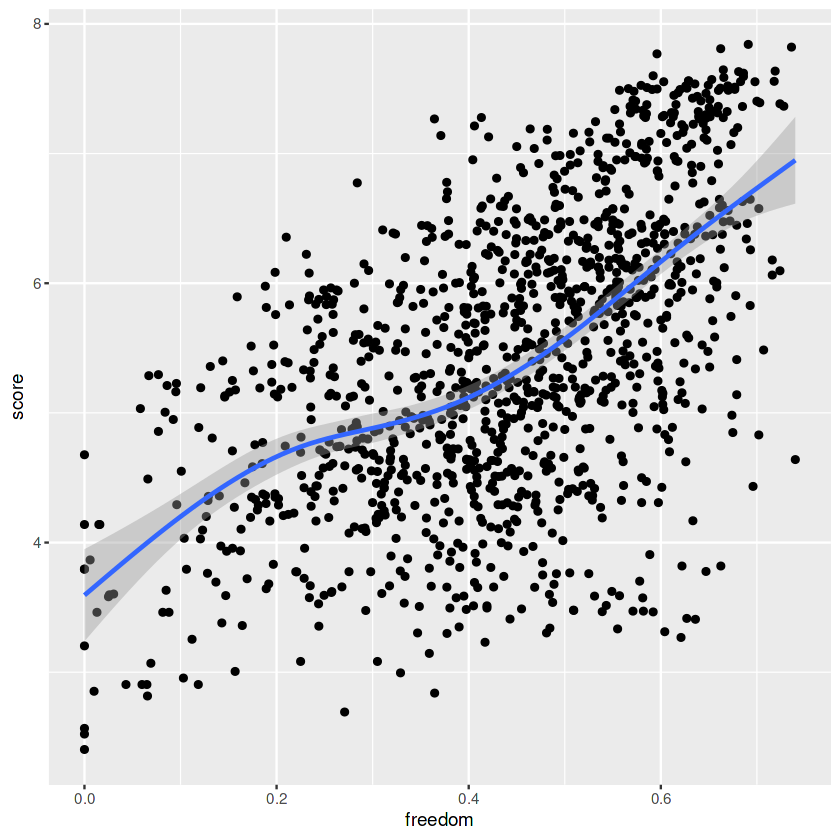

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



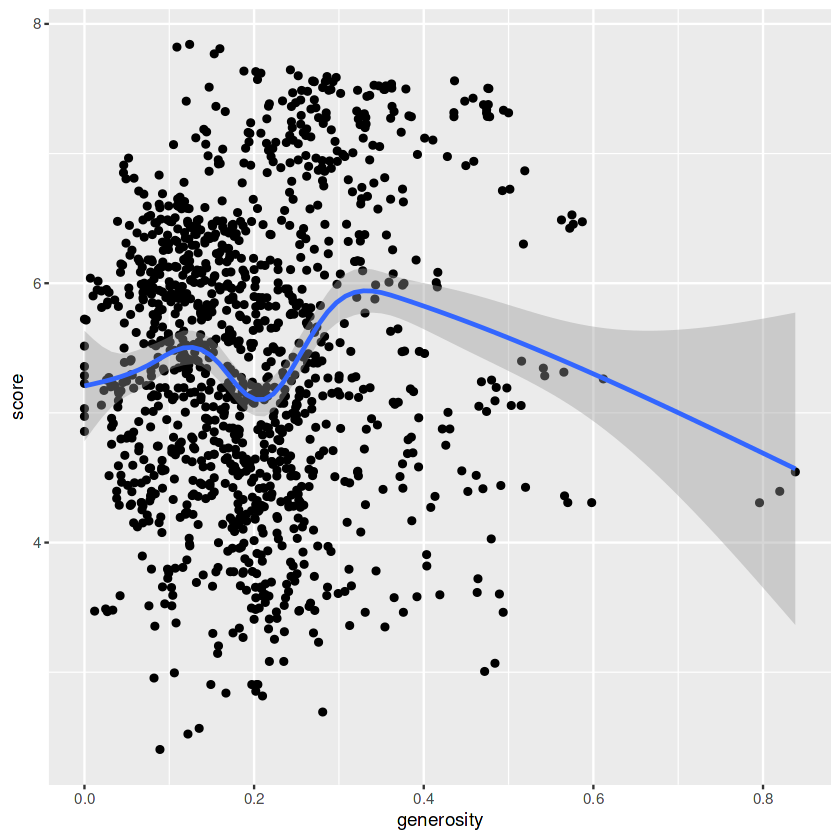

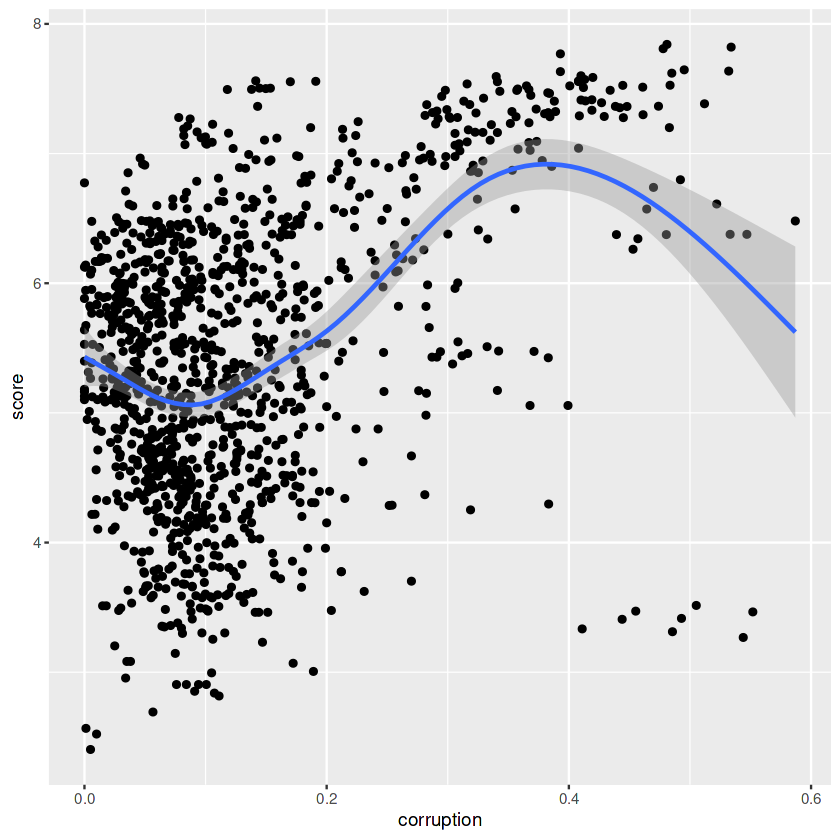

In [12]:
library(ggplot2)
ggplot(data = combined) +geom_point(mapping = aes(x= dystopia,y = score))+geom_smooth(mapping = aes(x= dystopia,y = score))
ggplot(data = combined) +geom_point(mapping = aes(x= GDP,y = score))+geom_smooth(mapping = aes(x= GDP,y = score))
ggplot(data = combined) +geom_point(mapping = aes(x= social_support,y = score))+geom_smooth(mapping = aes(x= social_support,y = score))
ggplot(data = combined) +geom_point(mapping = aes(x= life,y = score))+geom_smooth(mapping = aes(x= life,y = score))
ggplot(data = combined) +geom_point(mapping = aes(x= freedom,y = score))+geom_smooth(mapping = aes(x= freedom,y =  score))
ggplot(data = combined) +geom_point(mapping = aes(x= generosity,y =score))+geom_smooth(mapping = aes(x= generosity,y =  score))
ggplot(data = combined) +geom_point(mapping = aes(x= corruption,y = score))+geom_smooth(mapping = aes(x= corruption,y =  score))

In [13]:
library(caret)
combined

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress




rank,country,score,dystopia,GDP,social_support,life,freedom,generosity,corruption
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Switzerland,7.587,2.51738,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
2,Iceland,7.561,2.70201,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
3,Denmark,7.527,2.49204,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
4,Norway,7.522,2.46531,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
5,Canada,7.427,2.45176,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957
6,Finland,7.406,2.61955,1.29025,1.31826,0.88911,0.64169,0.23351,0.41372
7,Netherlands,7.378,2.46570,1.32944,1.28017,0.89284,0.61576,0.47610,0.31814
8,Sweden,7.364,2.37119,1.33171,1.28907,0.91087,0.65980,0.36262,0.43844
9,New Zealand,7.286,2.26425,1.25018,1.31967,0.90837,0.63938,0.47501,0.42922


In [14]:
#把全部年份的拆成training 和testing 
#分別對7個因素做ml算標準差 rank	country	score	dystopia	GDP	social_support	life	freedom	generosity	corruption
library(caret)

seed <- sample(1:100, size = 1)
set.seed(seed)
split <- createDataPartition(combined$rank, p=0.8, list = FALSE)
training_set <-combined[split,]
testing_set <- combined[-split,]

dystopia_model <- lm(formula = score ~ dystopia, data = training_set)
gdp_model <- lm(formula = score ~ GDP, data = training_set)
social_support_model <- lm(formula = score ~ social_support, data = training_set)
life_model <- lm(formula = score ~ life, data = training_set)
freedom_model <- lm(formula = score ~ freedom, data = training_set)
generosity_model <- lm(formula = score ~ generosity, data = training_set)
corruption_model <- lm(formula = score ~ corruption, data = training_set)

In [15]:
total = 0
for(i in 1:50){
    result <- predict(dystopia_model, data.frame(dystopia = testing_set$dystopia))
    total <- total + (result[i]-testing_set$score[i])^2
}
dys_rms <- sqrt(total/50)

total = 0
for(i in 1:50){
    result <- predict(gdp_model, data.frame(GDP = testing_set$GDP))
    total <- total + (result[i]-testing_set$score[i])^2
}
gdp_rms <- sqrt(total/50)

total = 0
for(i in 1:50){
    result <- predict(social_support_model, data.frame(social_support = testing_set$social_support))
    total <- total + (result[i]-testing_set$score[i])^2
}
social_rms <- sqrt(total/50)

total = 0
for(i in 1:50){
    result <- predict(life_model, data.frame(life = testing_set$life))
    total <- total + (result[i]-testing_set$score[i])^2
}
life_rms <- sqrt(total/50)

total = 0
for(i in 1:50){
    result <- predict(freedom_model, data.frame(freedom = testing_set$freedom))
    total <- total + (result[i]-testing_set$score[i])^2
}
freedom_rms <- sqrt(total/50)

total = 0
for(i in 1:50){
    result <- predict(generosity_model, data.frame(generosity = testing_set$generosity))
    total <- total + (result[i]-testing_set$score[i])^2
}
generosity_rms <- sqrt(total/50)

total = 0
for(i in 1:50){
    result <- predict(corruption_model, data.frame(corruption = testing_set$corruption))
    total <- total + (result[i]-testing_set$score[i])^2
}
corruption_rms <- sqrt(total/50)

In [16]:
dys_rms
gdp_rms
social_rms
life_rms
freedom_rms
generosity_rms
corruption_rms

1 
0.8681853

1 
0.6557151

1 
0.8252697

1 
0.7531654

1 
0.9932436

1 
1.051459

1 
0.9221112